In [1]:
import os 
import sys
import time
import datetime
import dateutils
import collections
import itertools
from tqdm.notebook import tqdm

import numpy as np
import pandas as pd
import scipy as sci
from matplotlib_venn import venn2, venn2_circles, venn3, venn3_circles
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
matplotlib.rcParams['figure.figsize'] = (8, 8)
sns.set_style('whitegrid')

In [3]:
# будем использовать спарк
import pyspark
import pyspark.sql.functions as F
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('abc').getOrCreate()
spark


part-00007 part-00006 part-00004


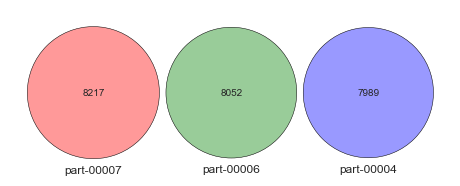

part-00007 part-00006 part-00005


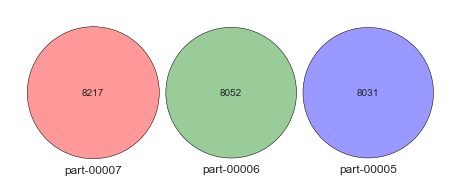

part-00007 part-00006 part-00000


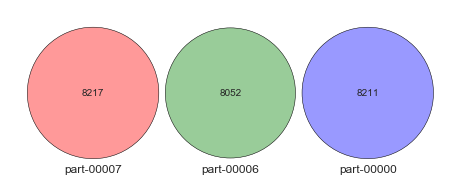

part-00007 part-00006 part-00009


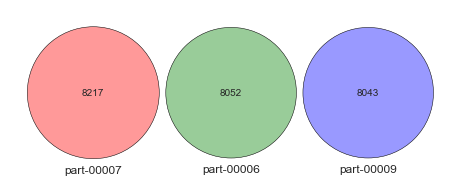

part-00007 part-00006 part-00008


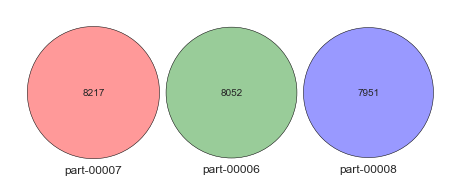

part-00007 part-00006 part-00001


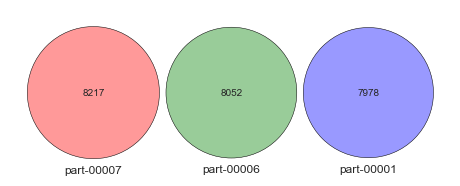

part-00007 part-00006 part-00003


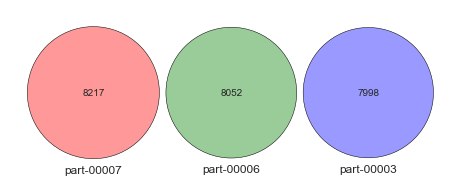

part-00007 part-00006 part-00002


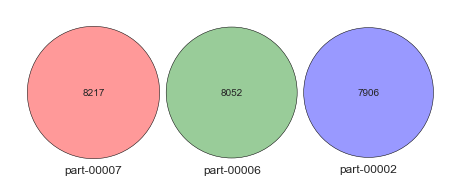

part-00007 part-00004 part-00005


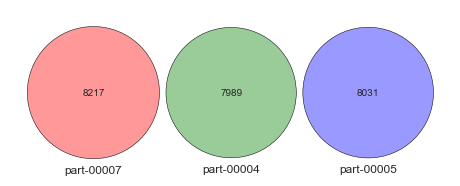

part-00007 part-00004 part-00000


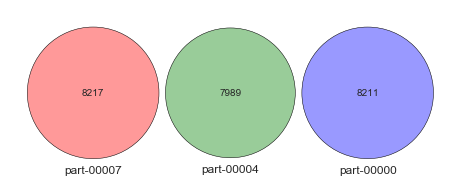

part-00007 part-00004 part-00009


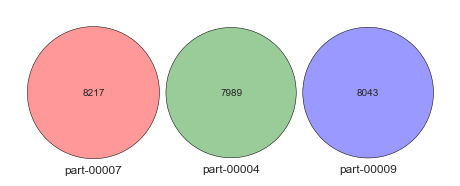

part-00007 part-00004 part-00008


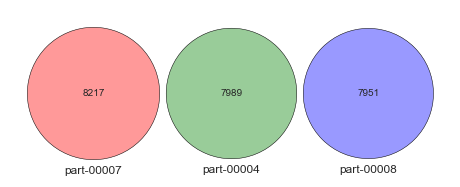

part-00007 part-00004 part-00001


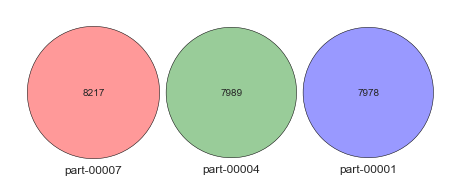

part-00007 part-00004 part-00003


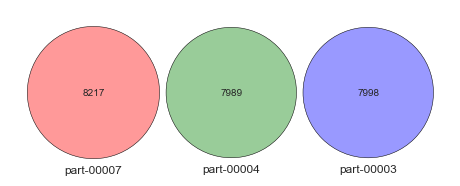

part-00007 part-00004 part-00002


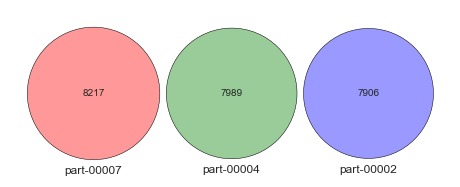

part-00007 part-00005 part-00000


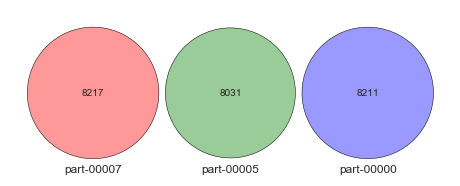

part-00007 part-00005 part-00009


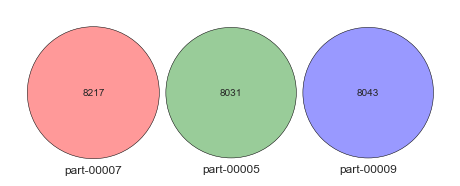

part-00007 part-00005 part-00008


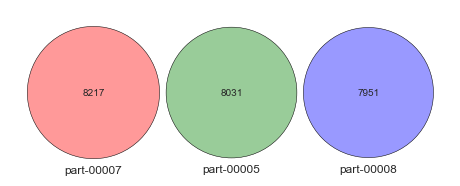

part-00007 part-00005 part-00001


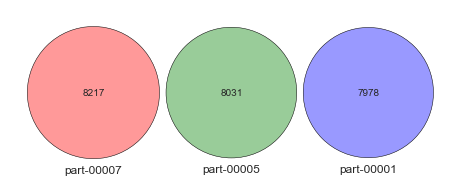

part-00007 part-00005 part-00003


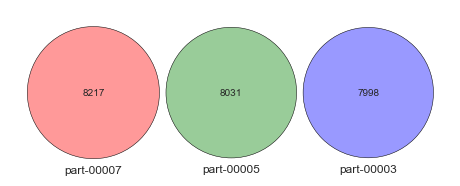

part-00007 part-00005 part-00002


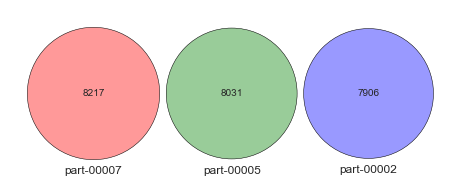

part-00007 part-00000 part-00009


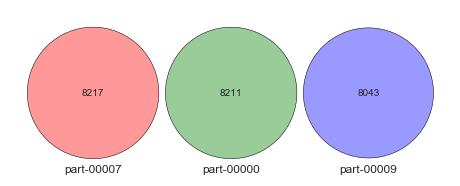

part-00007 part-00000 part-00008


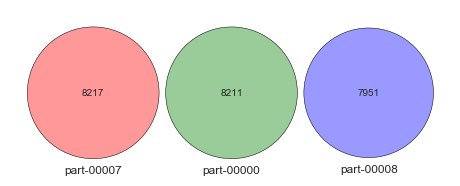

part-00007 part-00000 part-00001


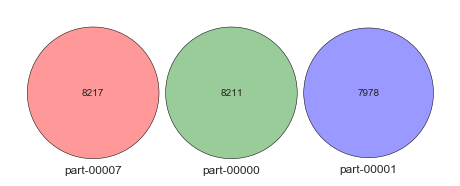

part-00007 part-00000 part-00003


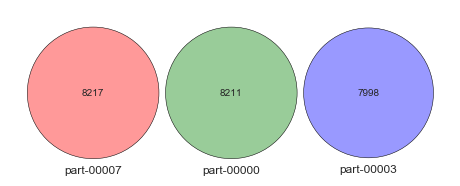

part-00007 part-00000 part-00002


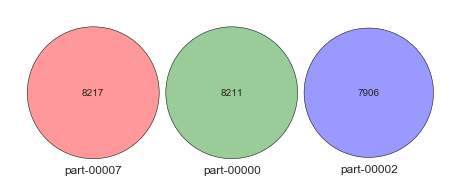

part-00007 part-00009 part-00008


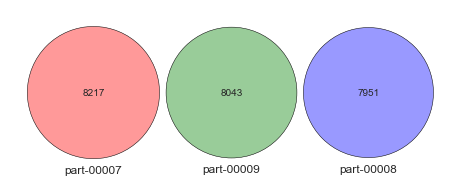

part-00007 part-00009 part-00001


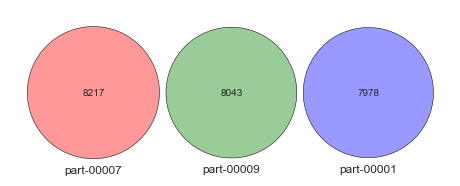

part-00007 part-00009 part-00003


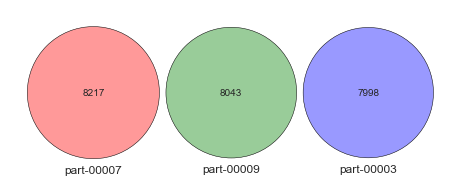

part-00007 part-00009 part-00002


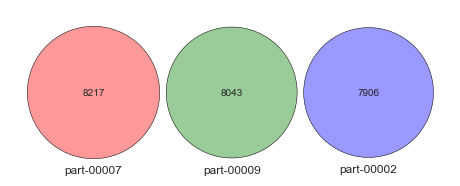

part-00007 part-00008 part-00001


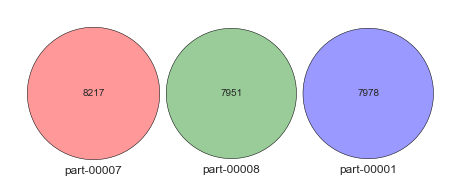

part-00007 part-00008 part-00003


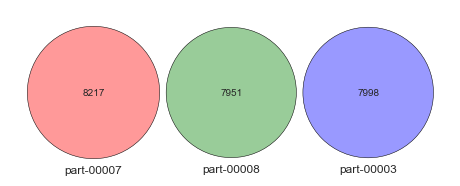

part-00007 part-00008 part-00002


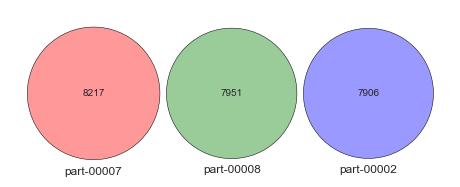

part-00007 part-00001 part-00003


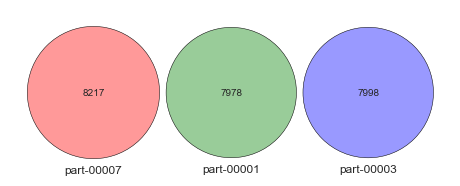

part-00007 part-00001 part-00002


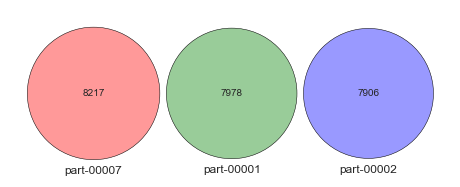

part-00007 part-00003 part-00002


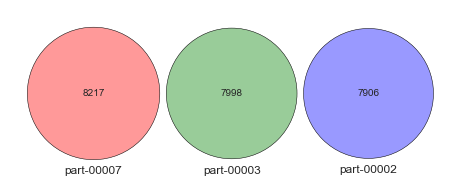

part-00006 part-00004 part-00005


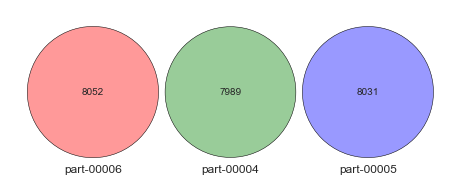

part-00006 part-00004 part-00000


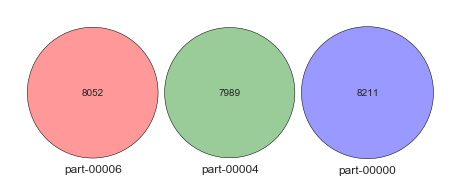

part-00006 part-00004 part-00009


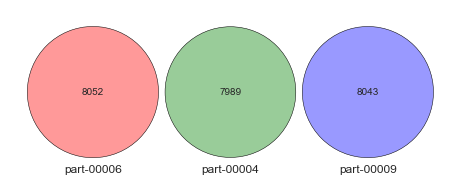

part-00006 part-00004 part-00008


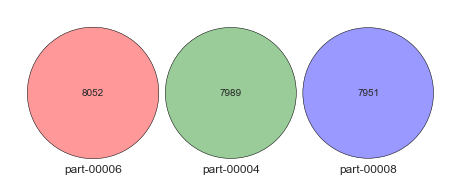

part-00006 part-00004 part-00001


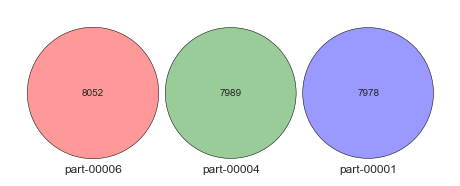

part-00006 part-00004 part-00003


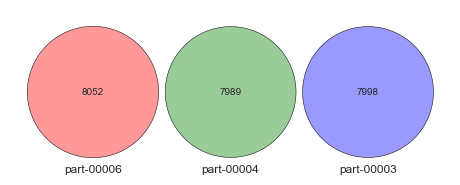

part-00006 part-00004 part-00002


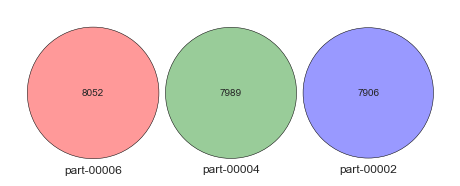

part-00006 part-00005 part-00000


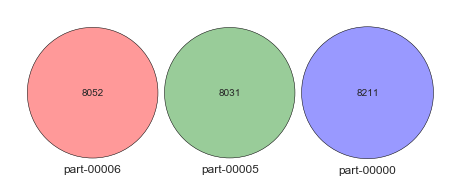

part-00006 part-00005 part-00009


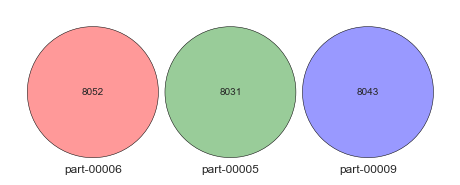

part-00006 part-00005 part-00008


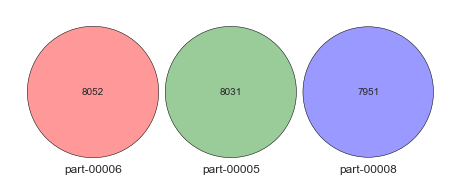

part-00006 part-00005 part-00001


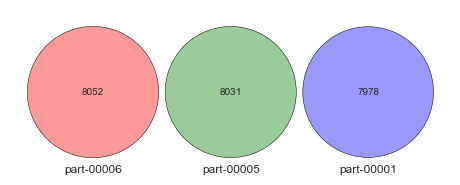

part-00006 part-00005 part-00003


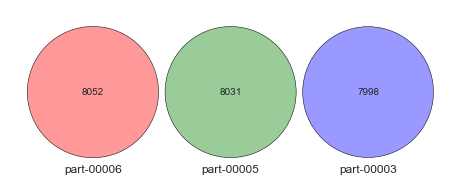

part-00006 part-00005 part-00002


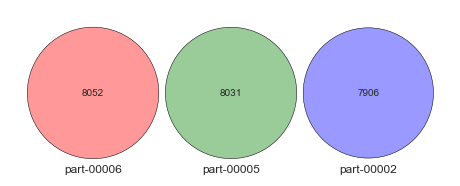

part-00006 part-00000 part-00009


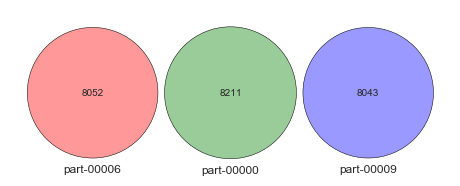

part-00006 part-00000 part-00008


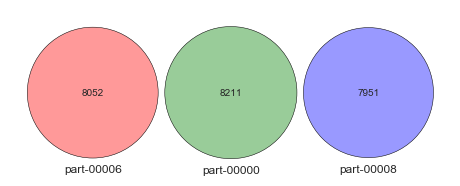

part-00006 part-00000 part-00001


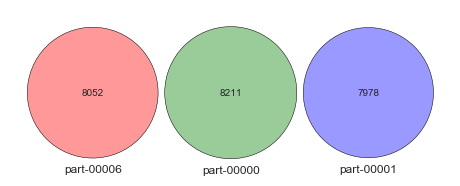

part-00006 part-00000 part-00003


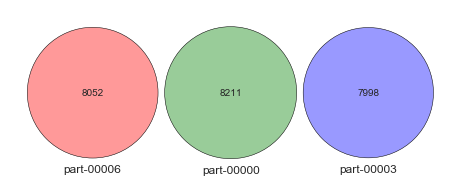

part-00006 part-00000 part-00002


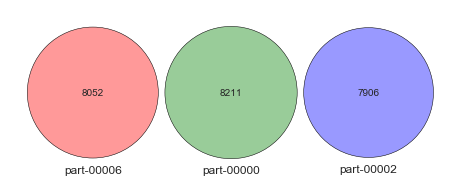

part-00006 part-00009 part-00008


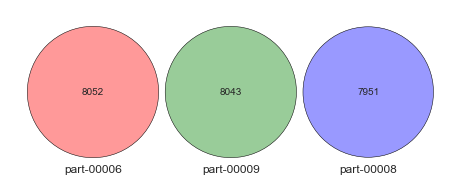

part-00006 part-00009 part-00001


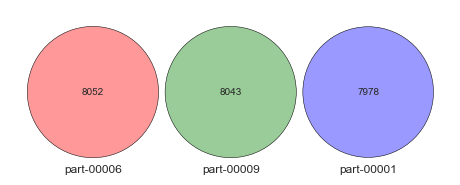

part-00006 part-00009 part-00003


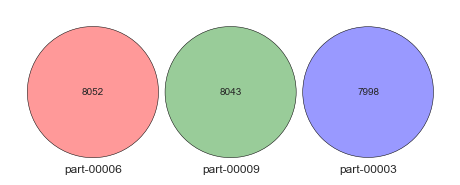

part-00006 part-00009 part-00002


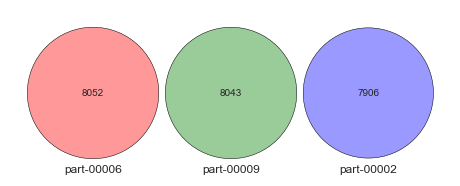

part-00006 part-00008 part-00001


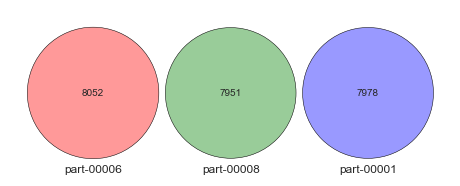

part-00006 part-00008 part-00003


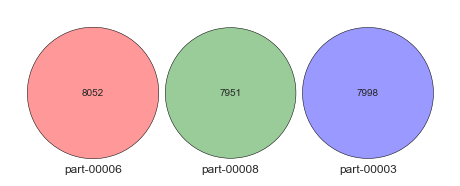

part-00006 part-00008 part-00002


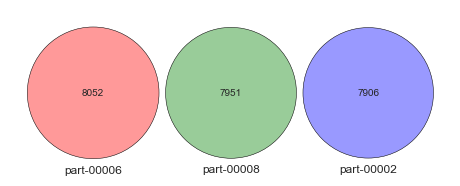

part-00006 part-00001 part-00003


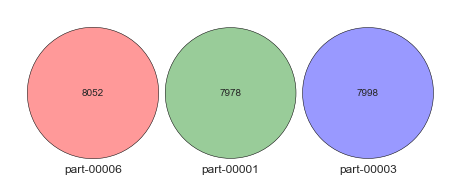

part-00006 part-00001 part-00002


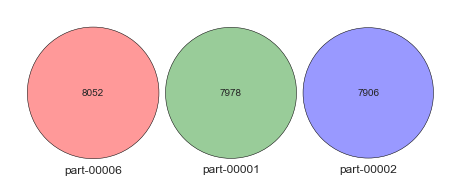

part-00006 part-00003 part-00002


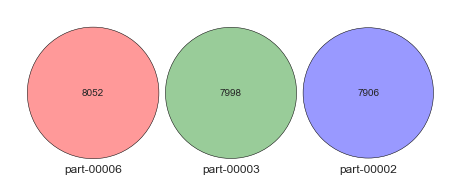

part-00004 part-00005 part-00000


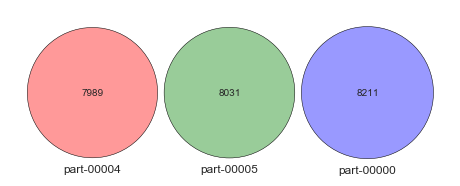

part-00004 part-00005 part-00009


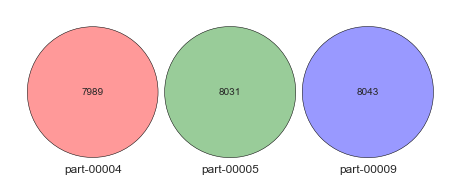

part-00004 part-00005 part-00008


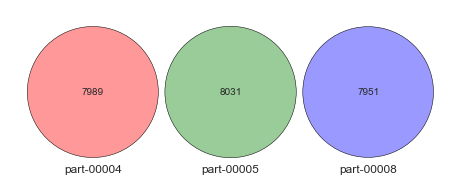

part-00004 part-00005 part-00001


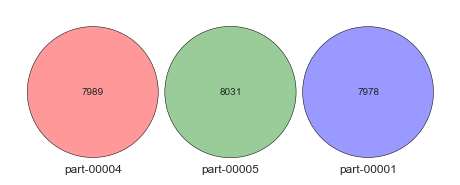

part-00004 part-00005 part-00003


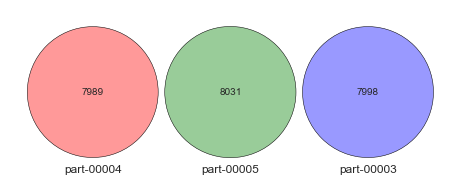

part-00004 part-00005 part-00002


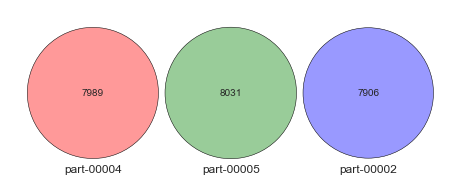

part-00004 part-00000 part-00009


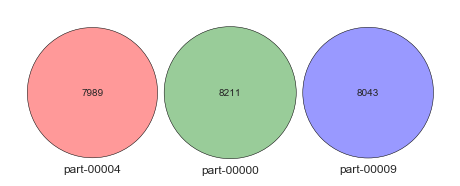

part-00004 part-00000 part-00008


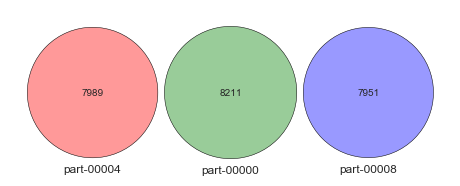

part-00004 part-00000 part-00001


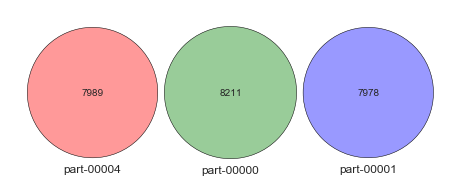

part-00004 part-00000 part-00003


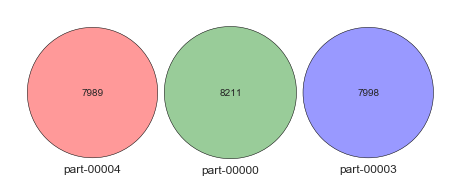

part-00004 part-00000 part-00002


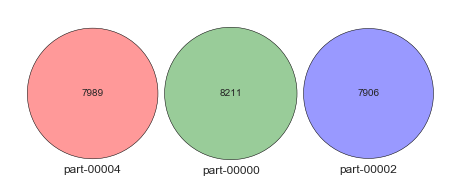

part-00004 part-00009 part-00008


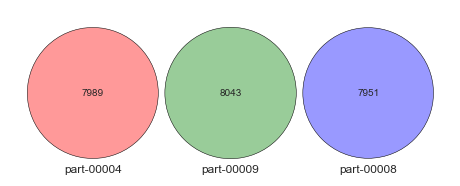

part-00004 part-00009 part-00001


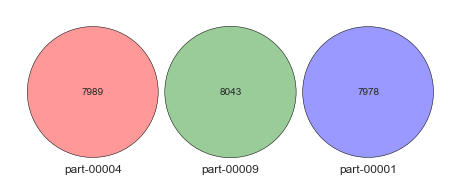

part-00004 part-00009 part-00003


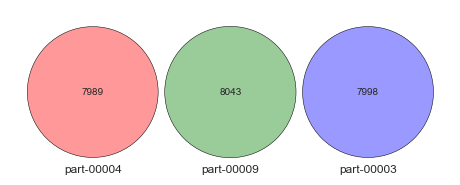

part-00004 part-00009 part-00002


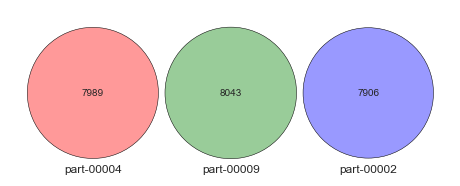

part-00004 part-00008 part-00001


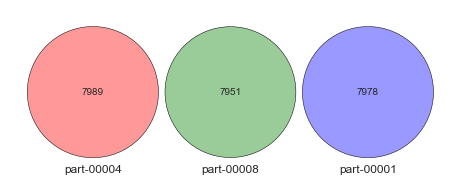

part-00004 part-00008 part-00003


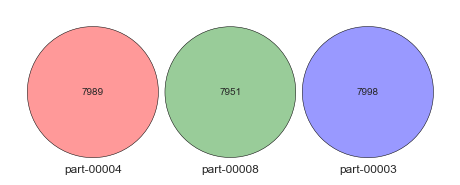

part-00004 part-00008 part-00002


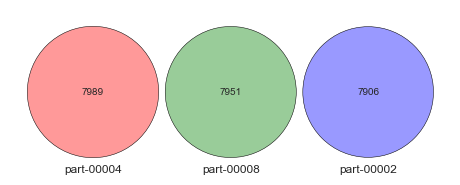

part-00004 part-00001 part-00003


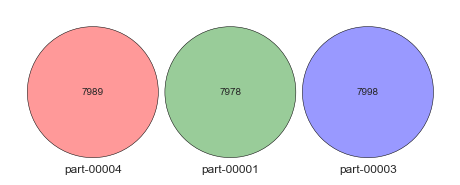

part-00004 part-00001 part-00002


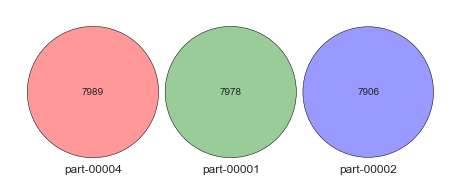

part-00004 part-00003 part-00002


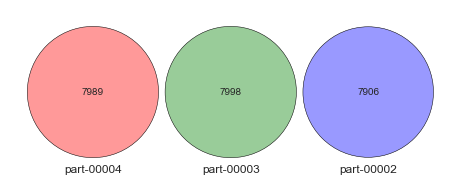

part-00005 part-00000 part-00009


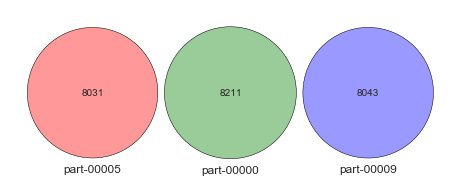

part-00005 part-00000 part-00008


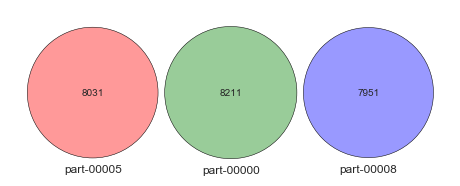

part-00005 part-00000 part-00001


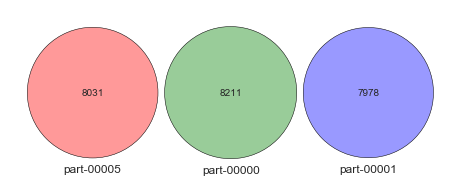

part-00005 part-00000 part-00003


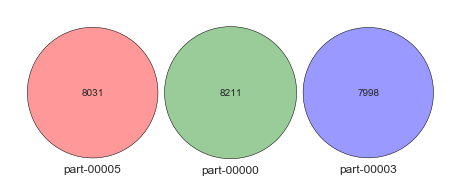

part-00005 part-00000 part-00002


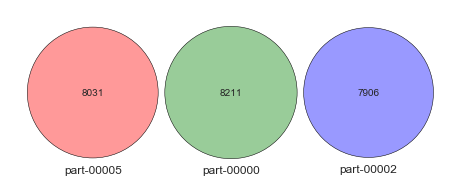

part-00005 part-00009 part-00008


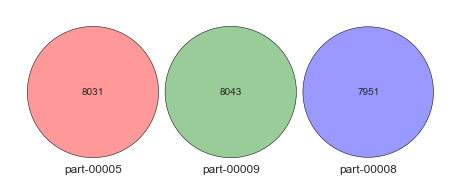

part-00005 part-00009 part-00001


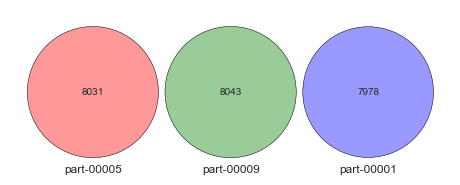

part-00005 part-00009 part-00003


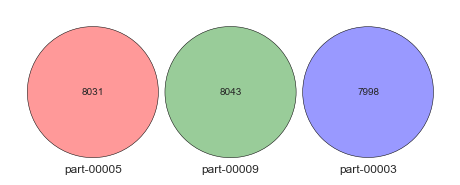

part-00005 part-00009 part-00002


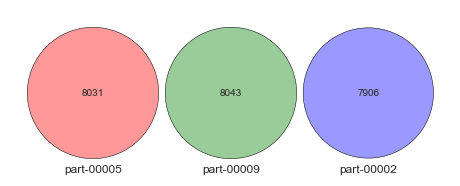

part-00005 part-00008 part-00001


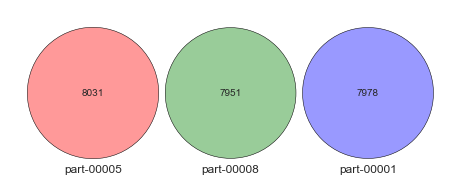

part-00005 part-00008 part-00003


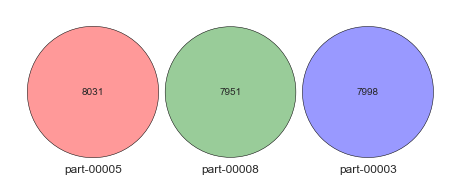

part-00005 part-00008 part-00002


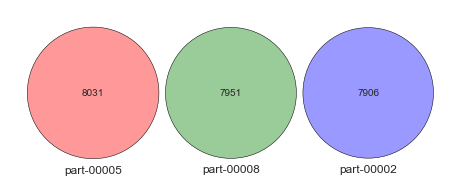

part-00005 part-00001 part-00003


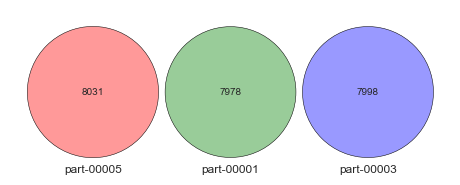

part-00005 part-00001 part-00002


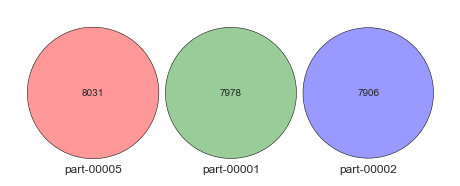

part-00005 part-00003 part-00002


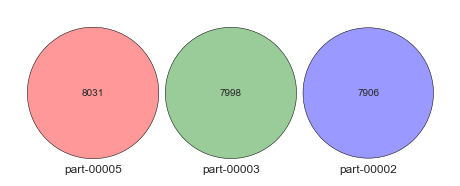

part-00000 part-00009 part-00008


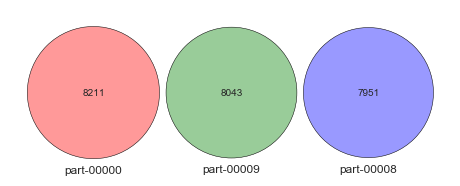

part-00000 part-00009 part-00001


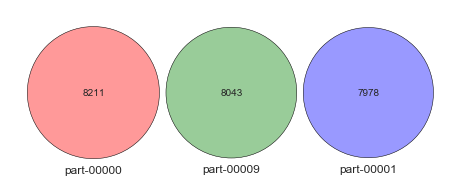

part-00000 part-00009 part-00003


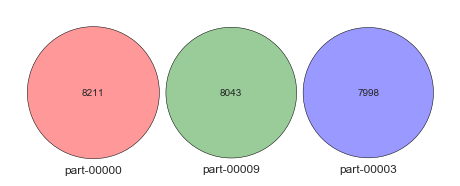

part-00000 part-00009 part-00002


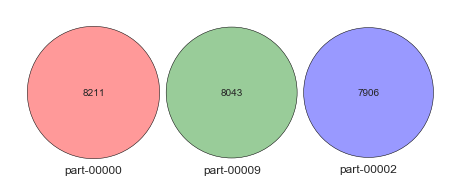

part-00000 part-00008 part-00001


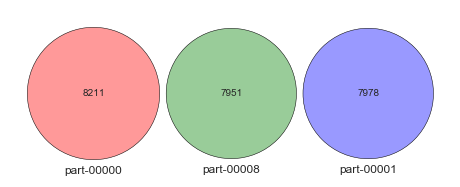

part-00000 part-00008 part-00003


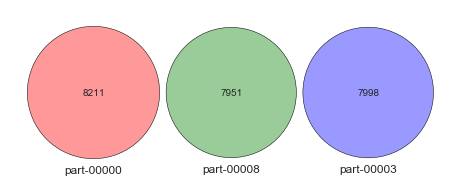

part-00000 part-00008 part-00002


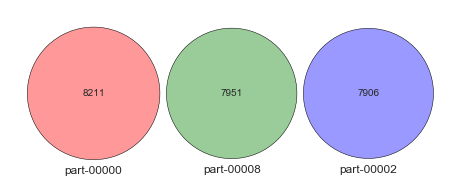

part-00000 part-00001 part-00003


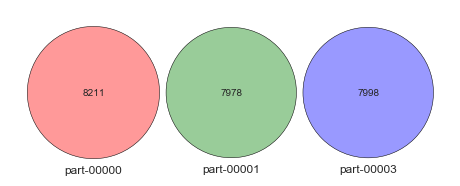

part-00000 part-00001 part-00002


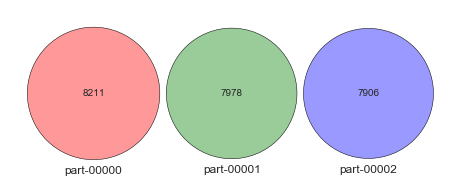

part-00000 part-00003 part-00002


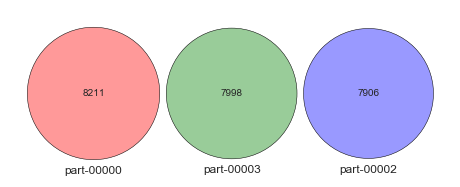

part-00009 part-00008 part-00001


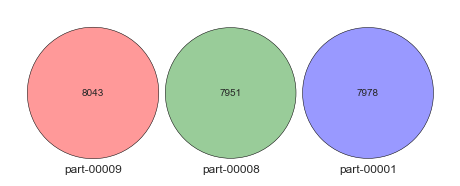

part-00009 part-00008 part-00003


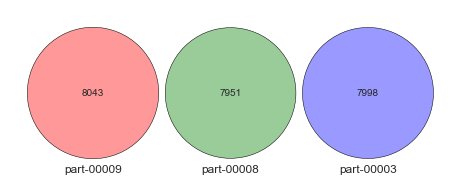

part-00009 part-00008 part-00002


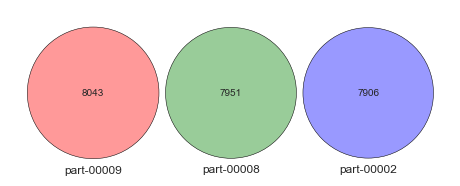

part-00009 part-00001 part-00003


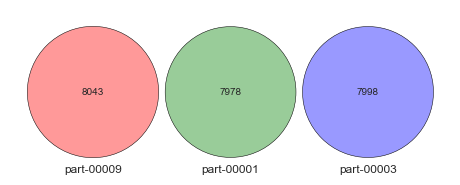

part-00009 part-00001 part-00002


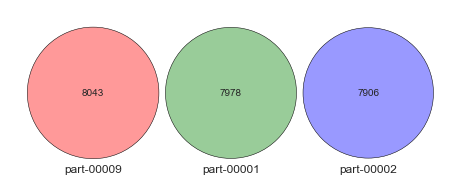

part-00009 part-00003 part-00002


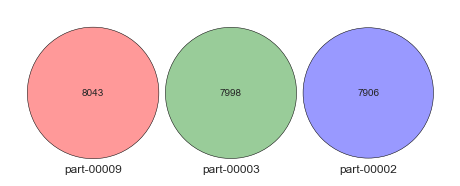

part-00008 part-00001 part-00003


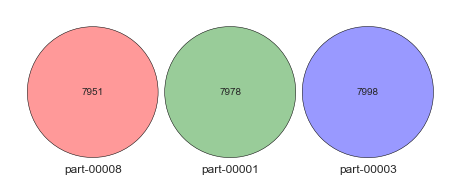

part-00008 part-00001 part-00002


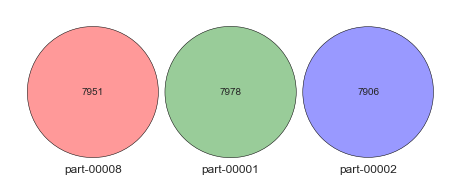

part-00008 part-00003 part-00002


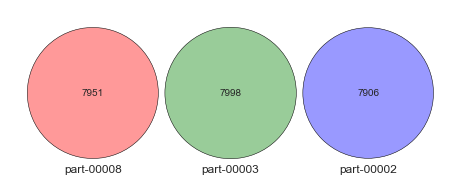

part-00001 part-00003 part-00002


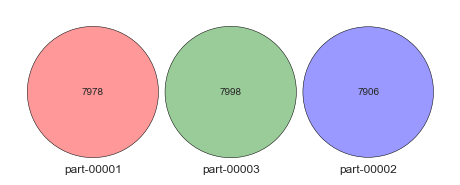

In [4]:
# Посмотрим, как распределяются клиенты по партициям
tmp_dict = {}
for part in tqdm(os.listdir('./raw_data/')):
    if 'part' in part:
        tmp_sdf = spark.read.parquet(os.path.join('./raw_data', part))
        tmp_dict[part.replace('.parquet', '')] = set(
                                                    tmp_sdf
                                                    .select('client')
                                                    .distinct()
                                                    .toPandas()['client']
                                                )
        
for key1, key2, key3 in itertools.combinations(tmp_dict, 3):
    print(key1, key2, key3)
    plt.figure(figsize=(8, 8))
    venn3(
        subsets=[
            tmp_dict[key1],
            tmp_dict[key2],
            tmp_dict[key3]
        ],
        set_labels=[key1, key2, key3]
    );

    venn3_circles(
        subsets=[
            tmp_dict[key1],
            tmp_dict[key2],
            tmp_dict[key3]
        ],
        linewidth=0.5
    );
    plt.show()

Вывод - партиции разбиты по клиенту

In [4]:
clickstream_sdf = spark.read.parquet('./raw_data/part-*')
print(f"clickstream_sdf: {clickstream_sdf.count():,}")
print(f"Число уникальных клиентов: {clickstream_sdf.select('client').distinct().count():,}")
clickstream_sdf.sample(fraction=10_000 / 120_025_286, withReplacement=False).toPandas().head(20)

clickstream_sdf: 120,025,286
Число уникальных клиентов: 80,376


,timestamp,application_id,client,session_id,event_type,event_category,event_name,event_label,device_screen_name,timezone,device_is_webview,page_urlhost,page_urlpath_full,net_connection_type,net_connection_tech
0,2020-01-20 14:52:51.141,anketa,62a7c2434c179284ecdb0c1536e14df6,24e7b5601a24c0f95ae184db840a25b0,pv,None,None,None,None,Europe/Minsk,True,anketa.alfabank.ru,3c932fa03e6ee7f92b6a5a854d885c13,None,None
1,2020-01-06 00:21:14.829,anketa,f83ab0734afda8e952fc464e537a89bd,42d6f5b5bc26ffc2d83f856b6a2af806,se,Ecommerce,View,a9ce16ac77656627714b57d486aca832,None,Europe/Minsk,True,anketa.alfabank.ru,2f38cdfb7a3f3c6a03c3d5f479198555,None,None
2,2020-03-26 01:43:00.984,anketa,54246f7870f6452d64fb7ee342154acc,da38d04dc3b42cb0b680e3bd8c27b872,se,Pil,Anketa::Сведения о работе::Click,718aa907e65479188069f05fd7fdc4e6,None,Europe/Minsk,True,anketa.alfabank.ru,b45564f6ba608b82ff32c826e1d347fb,None,None
3,2020-01-09 11:42:17.000,anketa,e95106da96530125b9b3f5903fce449e,8505bba1d46392bedec48f08f0f68d0a,se,Pil,Anketa::Сведения о регистрации::Click,dfdcdb8fc8b98b4967d5c5b87752d696,None,Asia/Yakutsk,True,anketa.alfabank.ru,b45564f6ba608b82ff32c826e1d347fb,None,None
4,2020-08-17 17:50:26.147,anketa,787240fd25ae9c4883d9289ad3c96ed8,a34d6b2262d0dbdbf1a78386b637dddb,se,Pil,217f4e25cf552ee9029c4b3d93094981,2cfdbc343e1d7f8bb7ca028871057782,None,Europe/Minsk,True,anketa.alfabank.ru,b58c5f648b4de08044410ca03d4ea41b,None,None
5,2020-06-30 19:24:20.884,anketa,32a5407fc2bf1fe6a847bdd1cdd289d0,232a9b15336d5caa6f29837928dfa1ca,se,interactions,fieldFilling,d27a141201d6c99caa22a1cc3043ede5,None,Europe/Minsk,True,anketa.alfabank.ru,cf428b02442264f7a4a7949227979ec9,None,None
6,2020-08-29 18:40:59.288,anketa,cef11293519020bb0e60a720ae4af1f6,e7132521f34a8a51b5db430cab8247f2,se,Interactions,click,ce3eb1c4fd0bef9b55eb80db0a087f9a,None,Europe/Minsk,True,ipoteka.alfabank.ru,07c9ed0bb850006520d21fd774f98440,None,None
7,2020-05-02 22:59:32.303,mobile,0d4e3bf63062cfaf20f77972a3b0204d,e4ae943e56208ccddaa151d2be99f900,se,Application Lifecycle,Background,None,None,Asia/Yekaterinburg,True,None,None,mobile,EDGE
8,2020-03-13 14:25:19.075,mobile,4e063e25c757ff94ba38c3508c2b2a94,5a49cb3d32c9d1ade01db033a74908f3,se,Application Lifecycle,Background,None,None,Asia/Yekaterinburg,True,None,None,mobile,EDGE
9,2020-06-21 01:31:24.156,mobile,0369873a7a1022bba55d6403cccd7e6b,35e91514f56fcd29a82e7777fd798996,se,Application Lifecycle,Foreground,None,None,Europe/Moscow,True,None,None,mobile,EDGE


* __timestamp__ - дата и время совершения события

* __application_id__- идентификатор приложения

* __client__ - Идентификатор клиента 

* __session_id__ - Идентификатор сессии

* __event_type__ - Тип события

* __event_category__ - Категория события

* __event_name__ - Имя события

* __event_label__ - Дополнительный атрибут события
 
* __device_screen_name__ - Имя экрана на котором произошло событие

* __timezone__ - Часовой пояс

* __device_is_webview__ - Флаг того что страница открыта внутри webview
 
* __page_urlhost__ - Домен страницы

* __page_urlpath_full__ - Путь страницы

* __net_connection_type__ - Тип подключения

* __net_connection_tech__ - Технология подключения

In [23]:
target = pd.read_csv('./raw_data/alfabattle2_abattle_train_target.csv')
target['timestamp'] = pd.to_datetime(target['timestamp'])

In [6]:
print(f"target.shape[0]: {target.shape[0]:,}")
print(f"Число уникальных клиентов: {target['client_pin'].unique().shape[0]:,}")
target.head()

target.shape[0]: 5,065,350
Число уникальных клиентов: 79,268


,session_id,client_pin,timestamp,multi_class_target
0,0000029e72e5fcde6a9f29c3a3ed198f,7cf9221322a0e2fdefb1b998b8f2ab29,2020-06-15 14:01:12,main_screen
1,00063dffa47b0fe5556b2b9e8beddb6a,5f16c0ab27a806fd08db3122921adf3a,2020-03-21 12:59:34,invest
2,0007857f36d268ec46fcb7305538a1c7,ec868fc2b388293cf10e18ee9518d72f,2020-01-24 18:18:55,statement
3,000a7f25fc3609cdfda54c5f059aab00,91f55a33d7502c1a1fa5da7ff2f7b648,2020-03-15 19:50:23,main_screen
4,000b746d6616669663feaa1474ac97f1,3ef1020bda95ce7836d2680fa553ecb7,2020-02-20 07:56:58,main_screen


In [125]:
target_time_df = pd.read_csv('./raw_data/alfabattle2_prediction_session_timestamp.csv')
target_time_df['timestamp'] = pd.to_datetime(target_time_df['timestamp'])
print(f"{target_time_df.shape[0]:,}")
target_time_df.head()

79,268


,client_pin,timestamp
0,f0c674b2bb4dc64be607029271d706ec,2020-08-01 00:00:53
1,90725b54ce77576883813d87749df6bd,2020-08-01 00:02:57
2,eb0f82d74c7b7bd5eafbd5b5f8cb3e2a,2020-08-01 00:03:14
3,831bf4c0ecccc55e536b8cfb9153d672,2020-08-01 00:04:44
4,3f1a5a1c492ce877af833113e59c5797,2020-08-01 00:06:40


In [7]:
sample_sub_df = pd.read_csv('./raw_data/alfabattle2_abattle_sample_prediction.csv')

In [41]:
print(f"{sample_sub_df.shape[0]:,}")
sample_sub_df.head()

79,268


,client_pin,prediction
0,f0c674b2bb4dc64be607029271d706ec,credit_info
1,90725b54ce77576883813d87749df6bd,credit_info
2,eb0f82d74c7b7bd5eafbd5b5f8cb3e2a,own_transfer
3,831bf4c0ecccc55e536b8cfb9153d672,statement
4,3f1a5a1c492ce877af833113e59c5797,invest


### EDA

In [19]:
(
    clickstream_sdf
    .agg(
        F.min(F.col('timestamp')).alias('min_timestamp'),
        F.max(F.col('timestamp')).alias('min_timestamp')
    )
    .show()
)

+--------------------+--------------------+
|       min_timestamp|       min_timestamp|
+--------------------+--------------------+
|2020-01-01 03:00:...|2020-10-01 01:42:...|
+--------------------+--------------------+



In [25]:
# Доля Нанов в фичах кликстрима
(
    clickstream_sdf
    .agg(
        *[F.mean(F.when(F.isnull(F.col(col)), F.lit(1)).otherwise(F.lit(0))).alias(col) for col in 
              clickstream_sdf.columns]
    )
    .toPandas().T
)

,0
timestamp,0.000000
application_id,0.000000
client,0.000000
session_id,0.000000
event_type,0.000000
event_category,0.457430
event_name,0.464170
event_label,0.859631
device_screen_name,0.226116
timezone,0.000000


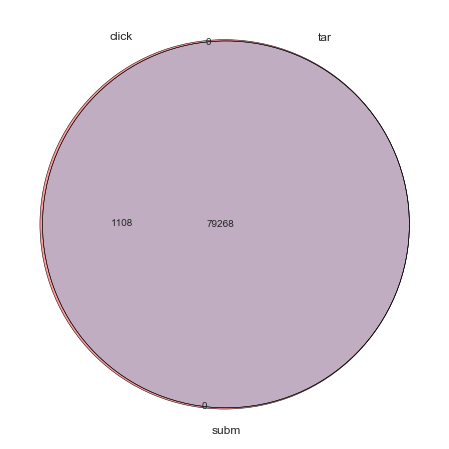

In [28]:
# Пересечение клиентов в кликстриме, таргетах и сэмпл сабмите
clickstream_clients_set = set(
    clickstream_sdf.select('client').distinct().toPandas()['client']
)

target_clients_set = set(
    target['client_pin']
)

sabm_clients_set = set(
    sample_sub_df['client_pin']
)

venn3(
    subsets=[
        clickstream_clients_set,
        target_clients_set,
        sabm_clients_set
    ],
    set_labels=['click', 'tar', 'subm']
);

venn3_circles(
    subsets=[
        clickstream_clients_set,
        target_clients_set,
        sabm_clients_set
    ],
    linewidth=0.5
);

В кликстриме на 1108 уникальных клиентов больше чем в таргете и сабмите

In [14]:
clickstream_sdf.columns

['timestamp',
 'application_id',
 'client',
 'session_id',
 'event_type',
 'event_category',
 'event_name',
 'event_label',
 'device_screen_name',
 'timezone',
 'device_is_webview',
 'page_urlhost',
 'page_urlpath_full',
 'net_connection_type',
 'net_connection_tech']

In [26]:
tmp_df = (
    clickstream_sdf
    .filter(
        (F.col('client') == '7cf9221322a0e2fdefb1b998b8f2ab29')
    )
    .orderBy(F.col('timestamp').asc())
#     .select(
#         F.col('client').alias('pin'),
#         F.col('timestamp').alias('time'),
#         F.col('session_id').alias('session'),
#         F.col('event_label').alias('labl')
#     )
    .toPandas()
)

tmp_df

,timestamp,application_id,client,session_id,event_type,event_category,event_name,event_label,device_screen_name,timezone,device_is_webview,page_urlhost,page_urlpath_full,net_connection_type,net_connection_tech
0,2020-01-01 14:22:34.180,mobile,7cf9221322a0e2fdefb1b998b8f2ab29,7091b2e1349627289f1226e7ae0cf791,sv,None,None,None,SignInActivity,Europe/Moscow,True,None,None,mobile,LTE
1,2020-01-01 14:22:40.700,mobile,7cf9221322a0e2fdefb1b998b8f2ab29,7091b2e1349627289f1226e7ae0cf791,sv,None,None,None,MainListFragment,Europe/Moscow,True,None,None,mobile,LTE
2,2020-01-01 14:22:46.124,mobile,7cf9221322a0e2fdefb1b998b8f2ab29,7091b2e1349627289f1226e7ae0cf791,se,Bottom Navigation,Click > Statements screen Tab,None,Main list,Europe/Moscow,True,None,None,mobile,LTE
3,2020-01-01 14:22:46.252,mobile,7cf9221322a0e2fdefb1b998b8f2ab29,7091b2e1349627289f1226e7ae0cf791,sv,None,None,None,StatementFragment,Europe/Moscow,True,None,None,mobile,LTE
4,2020-01-01 14:22:50.078,mobile,7cf9221322a0e2fdefb1b998b8f2ab29,7091b2e1349627289f1226e7ae0cf791,se,SingleStatement,load statement bonus,7a4e59a5d9e3bf6484ec3ca5e9f7e277,Single Statement,Europe/Moscow,True,None,None,mobile,LTE
5,2020-01-01 14:22:50.085,mobile,7cf9221322a0e2fdefb1b998b8f2ab29,7091b2e1349627289f1226e7ae0cf791,se,SingleStatement,load statement bonus,7a4e59a5d9e3bf6484ec3ca5e9f7e277,Single Statement,Europe/Moscow,True,None,None,mobile,LTE
6,2020-01-01 14:23:15.467,mobile,7cf9221322a0e2fdefb1b998b8f2ab29,7091b2e1349627289f1226e7ae0cf791,se,SingleStatement,Force refresh,None,Single Statement,Europe/Moscow,True,None,None,mobile,LTE
7,2020-01-01 14:23:16.857,mobile,7cf9221322a0e2fdefb1b998b8f2ab29,7091b2e1349627289f1226e7ae0cf791,se,SingleStatement,load statement bonus,7a4e59a5d9e3bf6484ec3ca5e9f7e277,Single Statement,Europe/Moscow,True,None,None,mobile,LTE
8,2020-01-01 14:23:17.656,mobile,7cf9221322a0e2fdefb1b998b8f2ab29,7091b2e1349627289f1226e7ae0cf791,se,Bottom Navigation,Click > Main list Tab,None,Statements screen,Europe/Moscow,True,None,None,mobile,LTE
9,2020-01-01 17:55:07.729,mobile,7cf9221322a0e2fdefb1b998b8f2ab29,041dfc0f1d734894727ca11f56714ff8,sv,None,None,None,SignInActivity,Europe/Moscow,True,None,None,mobile,LTE


In [44]:
target_sdf = spark.read.csv('./raw_data/alfabattle2_abattle_train_target.csv', header=True)

In [49]:
clickstream_sdf.select(F.col('timestamp').cast('timestamp')).show()

+--------------------+
|           timestamp|
+--------------------+
|2020-02-02 17:24:...|
|2020-05-25 02:21:...|
|2020-04-25 19:55:...|
| 2020-01-11 14:37:27|
|2020-01-31 11:36:...|
|2020-01-26 19:59:...|
| 2020-04-10 23:08:18|
|2020-01-20 18:00:...|
|2020-08-29 18:28:...|
|2020-03-02 10:49:...|
|2020-06-25 17:48:...|
|2020-02-27 15:11:...|
|2020-01-31 11:10:...|
|2020-01-31 11:37:...|
|2020-01-26 20:00:...|
|2020-01-23 20:35:...|
|2020-02-04 18:31:...|
|2020-02-04 18:33:...|
|2020-02-28 19:50:...|
|2020-02-28 19:50:...|
+--------------------+
only showing top 20 rows



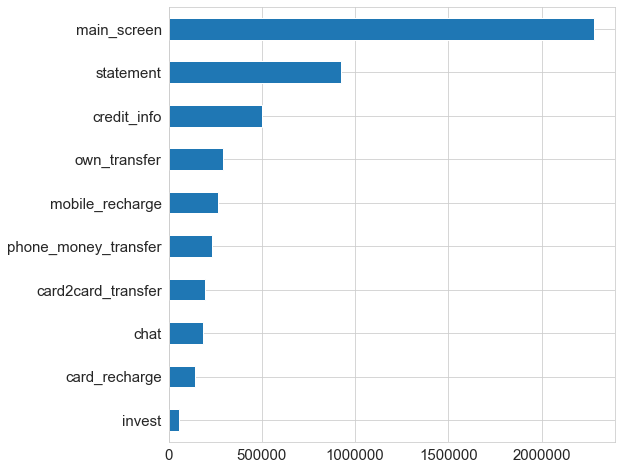

In [14]:
target.multi_class_target.value_counts(ascending=True).plot(kind='barh', fontsize=15);

In [60]:
%%time
tmp_sdf = (
    target_sdf
    .select('client_pin', F.col('timestamp').cast('timestamp'))
    .join(
        clickstream_sdf
        .select(F.col('client').alias('client_pin'), F.col('timestamp').cast('timestamp'))
        ,
        on=['client_pin', 'timestamp'],
        how='inner'
    )
)

tmp_sdf.count()

CPU times: user 32 ms, sys: 24.1 ms, total: 56.1 ms
Wall time: 3min 35s


32

In [63]:
clickstream_sdf.count()

120025286

### Features

In [72]:
(
    clickstream_sdf
    .filter(
        (F.col('client').contains('fb363113d6fa511ba')) &
        (F.col('timestamp') == datetime.datetime(2020, 1, 10, 18, 58, 45))
    )
    .toPandas()
)

,timestamp,application_id,client,session_id,event_type,event_category,event_name,event_label,device_screen_name,timezone,device_is_webview,page_urlhost,page_urlpath_full,net_connection_type,net_connection_tech
0,2020-01-10 18:58:45,mobile,fb363113d6fa511ba7d67873e2f7afa0,8472bdb2679f51090ec063034250cc8d,se,Chat,Request History Result > Success,None,Chat,Europe/Samara,None,None,None,mobile,LTE
1,2020-01-10 18:58:45,mobile,fb363113d6fa511ba7d67873e2f7afa0,8472bdb2679f51090ec063034250cc8d,se,Chat,Request History Result > Success,None,Chat,Europe/Samara,None,None,None,mobile,LTE
2,2020-01-10 18:58:45,mobile,fb363113d6fa511ba7d67873e2f7afa0,8472bdb2679f51090ec063034250cc8d,se,Chat,Request History Result > Success,None,Chat,Europe/Samara,None,None,None,mobile,LTE
3,2020-01-10 18:58:45,mobile,fb363113d6fa511ba7d67873e2f7afa0,8472bdb2679f51090ec063034250cc8d,se,Chat,Request History Result > Success,None,Chat,Europe/Samara,None,None,None,mobile,LTE
4,2020-01-10 18:58:45,mobile,fb363113d6fa511ba7d67873e2f7afa0,8472bdb2679f51090ec063034250cc8d,se,Chat,Request History Result > Success,None,Chat,Europe/Samara,None,None,None,mobile,LTE
5,2020-01-10 18:58:45,mobile,fb363113d6fa511ba7d67873e2f7afa0,8472bdb2679f51090ec063034250cc8d,se,Chat,Request History Result > Success,None,Chat,Europe/Samara,None,None,None,mobile,LTE
6,2020-01-10 18:58:45,mobile,fb363113d6fa511ba7d67873e2f7afa0,8472bdb2679f51090ec063034250cc8d,se,Chat,Request History Result > Success,None,Chat,Europe/Samara,None,None,None,mobile,LTE
7,2020-01-10 18:58:45,mobile,fb363113d6fa511ba7d67873e2f7afa0,8472bdb2679f51090ec063034250cc8d,se,Chat,Request History Result > Success,None,Chat,Europe/Samara,None,None,None,mobile,LTE
8,2020-01-10 18:58:45,mobile,fb363113d6fa511ba7d67873e2f7afa0,8472bdb2679f51090ec063034250cc8d,se,Chat,Request History Result > Success,None,Chat,Europe/Samara,None,None,None,mobile,LTE
9,2020-01-10 18:58:45,mobile,fb363113d6fa511ba7d67873e2f7afa0,8472bdb2679f51090ec063034250cc8d,se,Chat,Request History Result > Success,None,Chat,Europe/Samara,None,None,None,mobile,LTE


In [100]:
%%time
# Делаем для каждого действия клиента его номер, начиная от конца
target['rank'] = (
    target
    .groupby(['client_pin'])
    ['timestamp']
    .rank(method="first", ascending=False)
)

# Проверяем, что ранг посчитали правильно:
# pin'ы для проверки
# 674595ee5acb8c2ede30dadfa722ba9d 
# 25074c2bd77b64c40a4c6a623a748724    
# e17a88a65bca752fbb13c2418ba09d18 
# f8ae0cf709bae7760888c2a1497529a1

target.loc[
    (target['client_pin'] == '674595ee5acb8c2ede30dadfa722ba9d')
].sort_values(by=['timestamp'], ascending=True).tail()

CPU times: user 480 ms, sys: 7.41 ms, total: 487 ms
Wall time: 484 ms


,session_id,client_pin,timestamp,multi_class_target,rank
259124,cd975992021f1f9951255c7775c76ca5,674595ee5acb8c2ede30dadfa722ba9d,2020-07-30 13:26:17,main_screen,5.0
1155293,ff470d57211a67c86126381a77f3b9aa,674595ee5acb8c2ede30dadfa722ba9d,2020-09-25 07:01:48,card_recharge,4.0
1745389,23d524b52f49c107f3b4ecc9123ce9fe,674595ee5acb8c2ede30dadfa722ba9d,2020-09-25 16:12:35,main_screen,3.0
3425470,11f50a971370b86ca8226dbd2698125a,674595ee5acb8c2ede30dadfa722ba9d,2020-09-25 18:04:38,main_screen,2.0
2348336,e50b00171af117fd20216801f5835663,674595ee5acb8c2ede30dadfa722ba9d,2020-09-25 21:02:30,main_screen,1.0


In [65]:
(
    clickstream_sdf
    .groupBy('client', 'timestamp')
    .count()
    .orderBy(F.col('count').desc())
    .show()
)

+--------------------+-------------------+-----+
|              client|          timestamp|count|
+--------------------+-------------------+-----+
|fb363113d6fa511ba...|2020-01-10 18:58:45|   32|
|39a4c7a30aca52517...|2020-01-07 12:39:41|   29|
|d28806a814a5cce63...|2020-01-08 17:29:26|   28|
|d28806a814a5cce63...|2020-01-10 09:25:47|   27|
|d607b07242003eb72...|2020-01-08 15:41:34|   25|
|4bae833abd4a1696b...|2020-01-09 13:53:33|   23|
|73f5394f7ab5a7f6c...|2020-01-10 10:11:30|   23|
|73f5394f7ab5a7f6c...|2020-01-09 14:16:40|   22|
|503672d41d69e313b...|2020-01-08 21:50:31|   21|
|97b48ec157269e5ba...|2020-01-08 09:07:17|   21|
|3e4efc04461d2ccb7...|2020-01-09 03:13:07|   21|
|734c89e41e39dbabf...|2020-01-09 11:59:17|   21|
|60906c96a209f6fb1...|2020-01-09 12:21:30|   21|
|cb7d142436f729238...|2020-01-08 11:30:49|   20|
|3e4efc04461d2ccb7...|2020-01-09 03:07:48|   20|
|d28806a814a5cce63...|2020-01-09 13:00:46|   20|
|73f5394f7ab5a7f6c...|2020-01-09 14:56:20|   19|
|1e288e36927cfede0..

In [103]:
# Собираем датафрейм, где для каждого клиента по столбцам будут хранится даты его d последних действий и 
# сами эти действия
d = 50
Xy_df = pd.DataFrame(target['client_pin'].unique(), columns=['client_pin'])
for i in tqdm(range(1, d+1)):
    tmp_df = (
        target
        .loc[(target['rank'] == i), ['client_pin', 'timestamp', 'multi_class_target']]
        .rename(columns={"timestamp": f'timestamp_{i}', 'multi_class_target': f'action_{i}'})
    )
    Xy_df = Xy_df.merge(tmp_df, on=['client_pin'], how='left')
Xy_df = Xy_df.merge(target_time_df.rename(columns={'timestamp': 'timestamp_target'}), on=['client_pin'], how='left')

# Xy_df.to_csv('./tmp/Xy_df.csv', index=False)

In [371]:
Xy_df

,client_pin,timestamp_1,action_1,timestamp_2,action_2,timestamp_3,action_3,timestamp_4,action_4,timestamp_5,...,timestamp_target,target_col_time-timestamp_2,target_col_time-timestamp_3,target_col_time-timestamp_4,target_col_time-timestamp_5,target_col_time-timestamp_6,target_col_time-timestamp_7,target_col_time-timestamp_8,target_col_time-timestamp_9,target_col_time-timestamp_10
0,7cf9221322a0e2fdefb1b998b8f2ab29,2020-07-26 13:56:19,main_screen,2020-07-25 15:52:04,main_screen,2020-07-25 14:56:30,phone_money_transfer,2020-07-22 23:27:51,phone_money_transfer,2020-07-21 02:56:50,...,2020-08-02 18:37:47,79455.0,82789.0,311308.0,471569.0,768311.0,1376073.0,1466519.0,1469959.0,1471744.0
1,5f16c0ab27a806fd08db3122921adf3a,2020-08-17 15:23:42,main_screen,2020-08-17 09:11:36,main_screen,2020-08-16 09:19:24,statement,2020-08-06 09:06:39,statement,2020-08-01 18:33:16,...,2020-08-17 21:12:20,22326.0,108258.0,973023.0,1371026.0,1716315.0,2566560.0,2837616.0,2860211.0,2922332.0
2,ec868fc2b388293cf10e18ee9518d72f,2020-09-15 16:15:48,statement,2020-09-12 20:41:29,statement,2020-09-12 08:05:25,mobile_recharge,2020-09-11 15:57:03,mobile_recharge,2020-09-10 08:34:20,...,2020-09-16 11:22:41,243259.0,288623.0,346725.0,459688.0,620157.0,1759208.0,2097436.0,2507877.0,2513243.0
3,91f55a33d7502c1a1fa5da7ff2f7b648,2020-07-29 22:38:46,statement,2020-07-27 19:07:35,statement,2020-07-27 09:59:31,main_screen,2020-07-26 07:30:18,main_screen,2020-07-24 17:22:57,...,2020-08-14 09:44:27,185471.0,218355.0,313708.0,450949.0,457635.0,533248.0,538996.0,541742.0,549831.0
4,3ef1020bda95ce7836d2680fa553ecb7,2020-07-06 23:15:30,main_screen,2020-06-30 06:23:23,main_screen,2020-06-12 22:33:09,card_recharge,2020-06-12 10:56:44,statement,2020-04-25 08:33:54,...,2020-08-16 08:42:10,579127.0,2076141.0,2117926.0,6273696.0,7910545.0,8151576.0,8595363.0,9696408.0,11454177.0
5,037b49084e6678d5045cfd0d753b53e2,2020-09-03 06:52:40,card_recharge,2020-09-02 19:00:23,card_recharge,2020-09-02 16:32:47,card_recharge,2020-09-01 12:20:53,card_recharge,2020-09-01 11:39:28,...,2020-09-03 16:32:14,42737.0,51593.0,153107.0,155592.0,222845.0,234719.0,252622.0,308156.0,391992.0
6,f99aac31b7f06ec1cefd1bba35b1ea41,2020-09-21 01:48:55,statement,2020-09-19 15:09:08,phone_money_transfer,2020-09-17 18:47:43,phone_money_transfer,2020-09-09 22:08:39,own_transfer,2020-09-08 12:42:37,...,2020-09-22 13:14:58,124787.0,284472.0,963616.0,1083978.0,1415792.0,1578862.0,1652816.0,1672528.0,1690668.0
7,cb11659c5bec156fbaaac453230456c3,2020-08-03 16:16:20,main_screen,2020-08-03 15:36:25,main_screen,2020-08-03 14:43:49,main_screen,2020-08-03 13:33:42,main_screen,2020-08-03 13:16:25,...,2020-08-03 16:37:05,2395.0,5551.0,9758.0,10795.0,15773.0,17653.0,20958.0,22559.0,23752.0
8,c7a854d2f479950f69341e670cf829b1,2020-08-28 10:02:16,mobile_recharge,2020-08-27 15:08:56,main_screen,2020-08-26 12:26:56,own_transfer,2020-08-26 11:18:30,own_transfer,2020-08-24 20:28:39,...,2020-08-28 20:46:57,68000.0,164120.0,168226.0,308017.0,327661.0,334252.0,414277.0,496336.0,568436.0
9,e43b360fb311c0a35c65ef9d97c26532,2020-09-05 07:08:17,main_screen,2020-09-04 22:03:57,main_screen,2020-09-04 20:20:37,credit_info,2020-09-04 18:44:59,credit_info,2020-09-04 18:01:26,...,2020-09-05 14:28:20,32660.0,38860.0,44598.0,47211.0,121664.0,386826.0,1075567.0,2822845.0,7222266.0


In [85]:
(
    target
    .groupby(['client_pin'])
    ['timestamp']
    .count()
    .sort_values(ascending=False)
)

client_pin
674595ee5acb8c2ede30dadfa722ba9d    1646
25074c2bd77b64c40a4c6a623a748724    1626
e17a88a65bca752fbb13c2418ba09d18    1550
bdfb2a491cb1a146358319b6955d7308    1535
bb0a6c5a08ae8581854386e8421a3773    1487
9d2d868c1a25534190017c32c4c94299    1452
28a986fe76100867d16a1841630c0a84    1391
7c644b12a138ab77c8932d8e35c3bd9f    1380
d0209cfcb3ff095acd3c97c08c6c46a3    1300
16a958d3c1d280ecac0d93411a9af478    1287
dd8cbb3c0d353253f4463947e236a327    1262
045ce683bbddb7ca8dd8dfbce703d27f    1257
831772e461f26ace59527c84a3faafde    1215
c62083712a4b1d7445993c0fa557a5f4    1207
aac7c91a694620c36c632f5f34362d9b    1194
2702caf3578fa1b818516dba8de02de6    1170
ea212d74f043c19ea53dd49672c97f2d    1158
d2f0b556f2889d8a52b4b9a25690adc3    1152
d3bc724d1d44316227f3839eba5983f4    1128
5085a72296b67d36a866fbe28f398197    1118
93cc484a0202f19c230ec18d8189a7ef    1099
4c1f8ce9d73fcce485dff26efbc2b0a8    1092
25fb25270c6de77fce60f3ce1d91eb49    1067
0f4ed100798d16fae674c7595ad89451    1062
7c93b

In [255]:
# Xy_df = pd.read_csv('./tmp/Xy_df.csv')
for col in tqdm(Xy_df.columns):
    if 'timestamp' in col:
        Xy_df[col] = pd.to_datetime(Xy_df[col])

In [257]:
# Расстояние до целевого действия (количество секунд)
from typing import List

def compute_time_delta(target_time_col: pd.Series, time_cols_df: pd.DataFrame) -> pd.DataFrame:
    
    tmp_df = pd.DataFrame()
    for col in tqdm(time_cols_df.columns):
        tmp_series = target_time_col.reset_index(drop=True) - time_cols_df[col].reset_index(drop=True)
        tmp_series = tmp_series.apply(lambda x: x.days*24*60*60 + x.seconds)
        tmp_df[f'target_col_time-{col}'] = tmp_series
    return tmp_df

In [258]:
tmp_df = compute_time_delta(
    target_time_col=Xy_df['timestamp_1'], 
    time_cols_df=Xy_df[[f'timestamp_{i}' for i in range(2, 10+1)]]
)

Xy_df = pd.concat([Xy_df.reset_index(drop=True), tmp_df], axis=1)

### Разбиение на обучение и контроль

Можно попробовать 2 разбиения:
* Разбить клиентов на обучение и контроль, при это со всей известной историей
* Всех клиентов до определённого действия (по последнего действия) отнести в обечения, и оставшиеся действия всех клиентов отнести в контроль

1)

In [259]:
from sklearn.model_selection import train_test_split

In [260]:
Xy_tr, Xy_te = train_test_split(Xy_df, test_size=0.37, shuffle=True, random_state=42)
print(f'Xy_tr.shape[0]: {Xy_tr.shape[0]:,}, Xy_te.shape[0]: {Xy_te.shape[0]:,}')

Xy_tr.shape[0]: 49,938, Xy_te.shape[0]: 29,330


In [261]:
# Вспомогательная функция, для рисования графиков
def sort_by_other_array(which_sort_array: np.array, by_which_array: np.array) -> np.array:
    
    assert np.unique(by_which_array).shape[0] == by_which_array.shape[0], \
    'в by_which_array должны быть уникальные значения!'
    
    resulting_array = []
    for val in by_which_array:
        resulting_array.append(
            np.where(which_sort_array == val)[0][0]
        )
    return np.array(resulting_array)

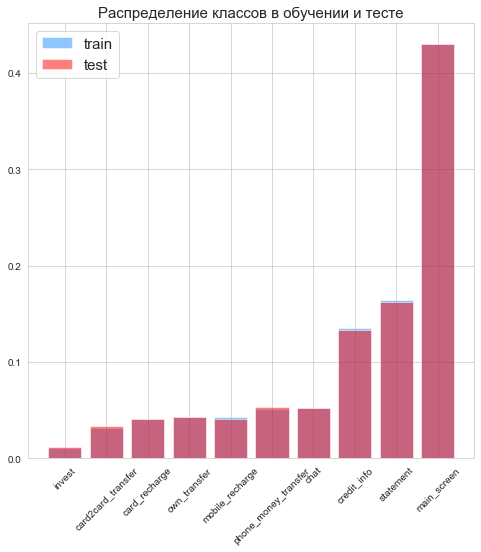

In [262]:
tar_tr, count_tr = np.unique(Xy_tr['action_1'], return_counts=True)
tar_te, count_te = np.unique(Xy_te['action_1'], return_counts=True)

tar_tr = tar_tr[np.argsort(count_tr)]
count_tr = np.sort(count_tr)
# сортируем значения в тесте так же, как сортировали в обучении
count_te = count_te[sort_by_other_array(which_sort_array=tar_te, by_which_array=tar_tr)]

plt.title(f'Распределение классов в обучении и тесте', fontsize=15)
plt.bar(tar_tr, count_tr/sum(count_tr), color='dodgerblue', alpha=0.5, label='train');
plt.bar(tar_tr, count_te/sum(count_te), color='red', alpha=0.5, label='test');
plt.legend(fontsize=15);
plt.tick_params(axis='x', rotation=45)

2)

In [ ]:
Xy_tr = Xy_df[['client_pin'] + [f'timestamp_{i}']]

### Models

In [272]:
from sklearn.metrics import f1_score

In [263]:
from catboost import CatBoostClassifier

In [264]:
N = 5
cat_features = [f'action_{i}' for i in range(2, N+1)]
feature_columns = [f'target_col_time-timestamp_{i}' for i in range(2, N+1)] \
                  + cat_features
target_col = 'action_1'

In [271]:
model = CatBoostClassifier(
    cat_features=cat_features
)

# Заполняем наны в кэт фичах -----------------------------------------------------------------------------------------
Xy_tr[cat_features] = Xy_tr[cat_features].fillna(method='bfill', axis=1).fillna(value='nan_category')
Xy_te[cat_features] = Xy_te[cat_features].fillna(method='bfill', axis=1).fillna(value='nan_category')
#---------------------------------------------------------------------------------------------------------------------

model.fit(Xy_tr[feature_columns], Xy_tr[target_col])

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Learning rate set to 0.096592
0:	learn: 2.1033429	total: 1.04s	remaining: 17m 17s
1:	learn: 1.9877065	total: 1.84s	remaining: 15m 18s
2:	learn: 1.8972226	total: 2.61s	remaining: 14m 27s
3:	learn: 1.8279585	total: 3.48s	remaining: 14m 26s
4:	learn: 1.7746617	total: 4.32s	remaining: 14m 19s
5:	learn: 1.7333728	total: 5.28s	remaining: 14m 34s
6:	learn: 1.6993663	total: 6.1s	remaining: 14m 25s
7:	learn: 1.6703400	total: 6.96s	remaining: 14m 23s
8:	learn: 1.6425218	total: 7.89s	remaining: 14m 28s
9:	learn: 1.6194305	total: 8.72s	remaining: 14m 23s
10:	learn: 1.5990959	total: 9.65s	remaining: 14m 27s
11:	learn: 1.5810770	total: 10.5s	remaining: 14m 26s
12:	learn: 1.5659897	total: 11.4s	remaining: 14m 26s
13:	learn: 1.5486123	total: 12.2s	remaining: 14m 18s
14:	learn: 1.5329432	total: 13s	remaining: 14m 12s
15:	learn: 1.5230104	total: 13.8s	remaining: 14m 8s
16:	learn: 1.5118126	total: 14.6s	remaining: 14m 2s
17:	learn: 1.5045132	total: 15.4s	remaining: 14m 1s
18:	learn: 1.4974143	total: 16.3

In [328]:
# # сохраняем модель
# import joblib
# joblib.dump(
#     value=model,
#     filename='./tmp/catboost_model.pkl'
# );

In [274]:
print('F1 на обучении:', 
        round(f1_score(
            y_true=Xy_tr['action_1'],
            y_pred=model.predict(Xy_tr[feature_columns]),
            average='macro'
        ), 3)
     )
print('F1 на тесте:', 
        round(f1_score(
            y_true=Xy_te['action_1'],
            y_pred=model.predict(Xy_te[feature_columns]),
            average='macro'
        ), 3)
     )

F1 на обучении: 0.416
F1 на тесте: 0.349


In [291]:
# Подготовка данных для прогноза:
Xy_for_pred = Xy_df.rename(columns={
    **{f'action_{i}': f'action_{i+1}' for i in range(1, 10+1)},
    **{f'target_time_col-timestamp_{i}': f'target_time_col-timestamp_{i+1}' for i in range(1, 10+1)}
})
Xy_for_pred.drop([col for col in Xy_for_pred.columns if 'target_col_time' in col], inplace=True, axis=1)
Xy_for_pred = pd.concat([
    Xy_for_pred.reset_index(drop=True),
    compute_time_delta(
        target_time_col=Xy_for_pred['timestamp_target'], 
        time_cols_df=Xy_for_pred[[f'timestamp_{i}' for i in range(2, 10+1)]]
    )
], axis=1)

In [301]:
predictions = model.predict_proba(Xy_for_pred[feature_columns])

In [360]:
pred_df = pd.concat([
    Xy_df[['client_pin']].reset_index(drop=True),
    pd.DataFrame(model.predict(Xy_for_pred[feature_columns]), columns=['pred']),
    pd.DataFrame(model.predict_proba(Xy_for_pred[feature_columns]).max(axis=1), columns=['probability'])
], axis=1)

In [361]:
pred_df = (
    ans_df
    .merge(
        pred_df,
        on=['client_pin'],
        how='left'
    )re
)

In [362]:
pred_df['multi_class_target'] = pred_df['multi_class_target'].where(
    cond=pred_df.probability < 0.5,
    other=pred_df.pred
)

In [363]:
pred_df[['client_pin', 'multi_class_target']].to_csv('alfaboosters_4.csv', index=False)

### Submission

In [351]:
sample_submission_df = pd.read_csv('./raw_data/alfabattle2_abattle_sample_prediction.csv')

In [335]:
tmp_df = (
    target
    .merge(
        target.groupby(['client_pin'])['timestamp'].max().reset_index(),
        on=['client_pin', 'timestamp'],
        how='inner'
    )
    .sort_values(by=['client_pin', 'timestamp'])
)

In [368]:
target.sort_values(by=['client_pin', 'timestamp'], ascending=True).tail()

,session_id,client_pin,timestamp,multi_class_target,rank
1871644,5e0b854589af1123f854e57a21ec476a,ffffe1150b0d2ca8005786cd35729226,2020-09-09 09:11:11,statement,5.0
3540598,bdb5f047ee0402f7549eb8a05fc16aa8,ffffe1150b0d2ca8005786cd35729226,2020-09-11 21:15:13,statement,4.0
4341224,419906aee714333629f47662a954e22f,ffffe1150b0d2ca8005786cd35729226,2020-09-12 09:18:15,mobile_recharge,3.0
2621133,5e3c9d3a7081f90495f5f8d74a1d1d10,ffffe1150b0d2ca8005786cd35729226,2020-09-13 21:38:16,phone_money_transfer,2.0
682309,a7b95fa31477d4b27285a477f77ee593,ffffe1150b0d2ca8005786cd35729226,2020-09-14 04:12:49,statement,1.0


In [369]:
ans_df = (
    sample_submission_df[['client_pin']]
    .merge(
        # Получаем последнее действие клиента в обучении --------------------------------
        target
        .merge(
            target.groupby(['client_pin'])['timestamp'].max().reset_index(),
            on=['client_pin', 'timestamp'],
            how='inner'
        )[['client_pin', 'multi_class_target']],
        on=['client_pin'],
        how='inner'
        #--------------------------------------------------------------------------------
    )
)

In [35]:
ans_df.to_csv('/Users/tony/Desktop/alfaboosters_1.csv', index=False)